# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.136248e+01     8.990366e+00
 * time: 0.002095937728881836
     1     2.336577e+01     5.215050e+00
 * time: 0.049803972244262695
     2     1.792828e+01     4.263032e+00
 * time: 0.05640602111816406
     3     1.326629e+01     2.953563e+00
 * time: 0.0636138916015625
     4     1.065594e+01     1.405850e+00
 * time: 0.07049393653869629
     5     1.000000e+01     2.052593e+00
 * time: 0.07615494728088379
     6     9.395788e+00     1.144529e+00
 * time: 0.08187985420227051
     7     8.943552e+00     1.045271e+00
 * time: 0.08762001991271973
     8     8.571686e+00     1.010324e+00
 * time: 0.09341287612915039
     9     8.299810e+00     7.635442e-01
 * time: 0.09952783584594727
    10     8.145424e+00     7.442307e-01
 * time: 0.10540485382080078
    11     8.050571e+00     6.193658e-01
 * time: 0.11093878746032715
    12     7.958110e+00     4.300594e-01
 * time: 0.11656689643859863
    13     7.926244e+00     6.237761e-01
 * time

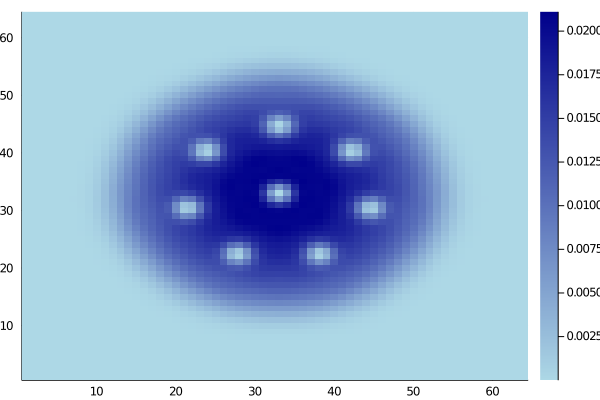

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)